In [1]:
%matplotlib inline

import nengo
import nengo_benchmarks
import nengo_normal_form
import nengo_gui.ipython

import numpy as np
import matplotlib.pyplot as plt
from SurrogateModel_ver1 import SurrogateModel 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Variables initialization
tau_syn = 0.05
sim_time = 10
dt = 0.001
rad = 10
dim = 1
ARMA_orders = [2, 0, 2]
trange= np.linspace(0, sim_time, num=sim_time/dt)
seed = None
desired_ens = 9

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


In [3]:
# Declare the input vector 
input_vec = (lambda t: t)
# input_vec = (lambda t: t*0+1) # Shows some difference in the beginning
# input_vec = (lambda t: np.cos(t))
# input_vec = (lambda t: t**2)
# input_vec = (lambda t: np.log(t))

In [4]:
# Initial model & connections from Nengo side
model = nengo_benchmarks.CommunicationChannel().make_model(D=dim, L=10, T=sim_time)
# model = nengo_benchmarks.CircularConvolution().make_model(D=dim)
# model, p = nengo_normal_form.convert(model, single_decoder=False)
# nengo_gui.ipython.IPythonViz(model)

# Minor edits to the model for convenience
with model:
    ensembles = model.ensembles
    probes = model.probes
    connections = model.connections
    pop = ensembles[desired_ens]    
    pop.radius = rad 

    input = input_vec(trange)
    input = np.reshape(input, (dim, int(sim_time/dt)))
    

In [5]:
# Pass in the model to the SurrogateModel API; initialize default parameters on the API side
surr_model = SurrogateModel(model, pop, dim, sim_time, dt, input, ARMA_orders, tau_syn)
nengo_gui.ipython.IPythonViz(model)

surr_model.run()

Building finished in 0:00:01.                                                   
Building finished in 0:00:01.                                                   
Simulating finished in 3.492972


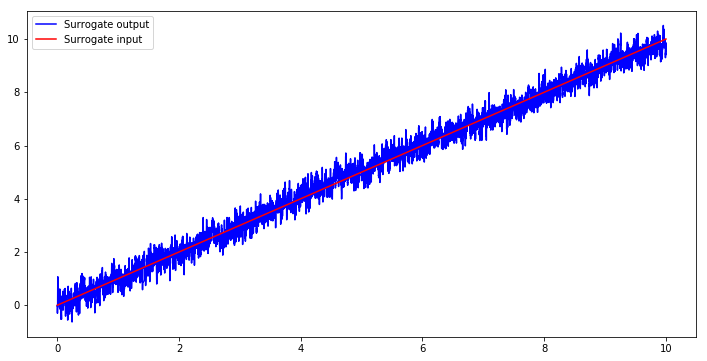

In [6]:
# Plot the surrogate model estimation
trange = surr_model.trange

plt.figure(figsize=(12,6))
plt.plot(trange, surr_model.output.T, 'b', label="Surrogate output")
plt.plot(trange, surr_model.input.T, 'r', label='Surrogate input')
# plt.plot(trange, surr_model.static_output.T, 'g', label="Static output")
plt.legend()